### **1.2 Properties of ARMA($p,q$)**

ARMA($p$, $q$) can also be written as follows:

$$ \alpha(B) X_{t} = \theta(B) W_{t} $$

Where:

> $\alpha(B)$ is AR polynomial and is equal to $\alpha(B) = 1 - \alpha_{1}B - \alpha_{2} B^{2} - \cdots - \alpha_{p} B^{p}$
> 
> $\theta(B)$ is MA polynomial and is equal to $\theta(B) = 1 + \theta_{1} B + \theta_{2} B^{2} + \cdots + \theta_{p} B^{q}$

With the above AR and MA polynomials, we can do the following calculations:

> a. Set the two polynomials to $0$ and solve for $B$. <br>
> b. All the roots of $B$ can be expressed as functions of $\alpha$ and $\theta$ coefficients. <br>
> c. Set the absolute values of all the roots of $B >1$, then convert all the inequalities in terms of $\alpha$ and $\theta$ coefficients. Now we have a set of inequalities to regulate $\alpha$ and $\theta$ coefficients <br>
> d. With these regularity conditions on $\alpha$ and $\theta$ coefficients, we can ensure that an ARMA($p,q$) time series $X_{t}$ can only be expressed as a function of its past values and not its future values. This property is called **causality**. The regularity conditions also ensure that $\{W_{t}\}$ from ARMA($p,q$) can be expressed as an infinite AR process. This property is called **invertibility**. <br>

Sometimes, we can find several models that work for our dataset. With several model options, we can choose the simplest one with the fewest parameters. Let's look at one ARMA example. Assume we have an ARMA(2,2) process as follows:

$$ X_{t} = 0.2 X_{t-1} + 0.35 X_{t-2} + W_{t} + W_{t-1} + 0.25 W_{t-2} $$

We can rewrite the above ARMA(2,2) as follows:

$$ (1 - 0.2B - 0.35B^{2}) X_{t} = (1 + B + 0.25B^{2}) W_{t} $$ 

Then, we can rewrite them in various factors:

$$ (1 - 0.7B) (1 + 0.5B) X_{t} = (1 - 0.5B) (1 + 0.5B) W_{t} $$

Then, the model can be simplified as follows:

$$ (1 - 0.7B) X_{t} = (1 - 0.5B) W_{t} $$

an ARMA(1,1) model instead of an ARMA(2,2).

The above rule of <u> selecting the model with the least number of coefficients or the simplest model is called **the principle of parsimony**. </u>
<span style='color: transparent; font-size:1%'>All rights reserved WQU WorldQuant University QQQQ</span>

## **2. ARIMA Model**

ARIMA Model stands for autoregressive integrated moving average model. Why do we add "integrated" into the name of the ARIMA model? "Integrated" in the ARIMA model means to include the differencing method to remove trend or seasonality in a time series. We learned from the last section that an ARMA model only handles stationary time series. It is different for an ARIMA model. An ARIMA model can handle non-stationary time series. 

Let's go over ARIMA's definition:

A time series $X_{t}$ follows a ARIMA($p,d,q$) process if $\nabla^{d} X_{t} = (1-B)^{d} X_{t}$ is ARMA($p,q$).

In general, we can write the ARIMA($p,d,q$) as follows:

$$ \nabla^{d} X_{t} = \alpha_{1} \nabla^{d} X_{t-1} + \alpha_{2} \nabla^{d} X_{t-2} + \cdots + \alpha_{p} \nabla^{d} X_{t-p} + \theta_{1} W_{t-1} + \theta_{2} W_{t-2} + \cdots + \theta_{q} W_{t-q} + W_{t} $$

We can also rewrite the model as follows:

$$ \alpha(B) (1-B)^{d} X_{t} = \theta(B) W_{t} $$

In ARIMA($p,d,q$), $p$ is the order of the AR component, $d$ is the order of differencing and $q$ is the order of the MA component.

We have learned a few time series models so far, they can all be special cases of ARIMA model. Figure 1 summarizes these models in terms of ARIMA representation.

**Figure 1: Special Cases for ARIMA Model**

| Time Series Model        | ARIMA($p,d,q$) Representation |
| :---                     | :---                          |
| White Noise              | ARIMA(0,0,0)                  |
| Random Walk              | ARIMA(0,1,0) with no constant |
| Random Walk with a Drift | ARIMA(0,1,0) with a constant |
| Autoregressive           | ARIMA($p$,0,0)                |
| Moving Average           | ARIMA(0,0,$q$)                |



## **3. Model Selection Criteria: AIC and BIC**

Before going into Box-Jenkins method, we would like to go over some metrics used to select the best time series model among several choices. 

The first one is **Akaike's information criterion (AIC)**. This is a metric that measures the goodness of fit for a model and can balance the trade off between less precise predictions vs. number of parameters in the model. <u> The lower the AIC, the better the model. </u> <u> **AIC** is preferred when the sample size is small. </u>

The second one is **Bayesian information criterion (BIC)**. It is also called Schwarz information criterion (SIC). BIC also measures the goodness of fit for a model by balancing the error of the model and the number of parameters. However, <u> BIC puts more emphasis on penalizing number of parameters. </u> Because of this feature in BIC, it usually prefers a simpler model with less parameters. We also look for a lowest BIC when comparing among several model candidates. 

In general, the AIC and BIC results would match. However, there are occasions where the two results would not be the same. If the results are different, one can report both. In the following examples, we will use AIC. 


## **4. Box-Jenkins Methodology**

The Box-Jenkins method was first introduced by George Box and Gwilym Jenkins. The Box-Jenkins method offers a methodology to derive models for time series data. The steps in Box-Jenkins method consist of 

> - model identification, 
> - model estimation, and 
> - model diagnostics. 
 
In the rest of the section, we will briefly discuss each step, and we will provide an application in the next section.

### **4.1 Model Identification**

We will use time series plot, ACF plot, and PACF plot and other information to select the order of AR($p$), order of differencing ($d$), or order of MA($q$) for a ARIMA model. Many times the plots or information at hand do not give us clear information to identify ($p,d,q$). For example, if both $p$ and $q$ are greater than $0$, both ACF and PACF plots will decline geometrically. In that case, we can create a list of possible ARIMA models with various $p,d,q$ combinations. We will then run each ARIMA model and record their AICs and BICs. Then, we choose the model with the smallest AIC and BIC values.


### **4.2 Model Estimation**

The Box-Jenkins method uses a **maximum likelihood method** and back-testing to estimate an ARIMA model.


### **4.3 Model Diagnostics**

After the model is built, we will use a residual plot, a residual QQ plot, ACF of residuals, and the Ljung-Box test to check the goodness-of-fit of the model. We use a residual plot to see if there is any pattern that shows up. We are looking for a random pattern if the model is constructed accurately. For a residual QQ plot, we are looking for the normality of residuals. ACF of residuals will give us an idea if there is autocorrelation among error terms from the model. The Ljung-Box test is to check if there is any overall autocorrelation in the residuals. Then, we will show you how to conduct the forecast once the model is finalized.


## **5. ARIMA Application: Google Stock Price**

In this section, we are going to demonstrate how to apply ARIMA to build a model for financial assets. We will use Google's stock price as an example. We will follow the Box-Jenkins methodology to build this model.


### **5.1 Model Identification and Model Estimation**

Model identification has always been a trial-and-error process. We usually try different model candidates until we get a satisfactory one. During the process of searching for a fit model, we will of course estimate a model candidate. Hence, in this section, we will combine model identification and model estimation together.

First, let's plot Google's stock time series plot, ACF plot, and PACF plot to take a look at the data.


In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

plt.rcParams["figure.figsize"] = (16, 9)  # Figure size and width

# Load datasets
m4_data = pd.read_csv("/home/sscf/wqu_mscfe/Financial Econometrics/M4/M4. goog_eur_10.csv", delimiter="\t")
dxyr_data = pd.read_csv("/home/sscf/wqu_mscfe/Financial Econometrics/M4/M4. dxy_r_data.csv", delimiter="\t")
m4_data = m4_data.loc[:, ["Date", "Year", "GOOGLE", "Volume", "EURUSD", "UST10Y"]]

# Convert date variable to date format
m4_data["Date2"] = pd.to_datetime(m4_data["Date"], format="%m/%d/%Y")
dxyr_data["Date2"] = pd.to_datetime(dxyr_data["Date"], format="%m/%d/%Y")

# Selecting columns and setting index
goog = m4_data.loc[:, ["Date2", "GOOGLE"]].set_index("Date2")
ust10 = m4_data.loc[:, ["Date2", "UST10Y"]].set_index("Date2")
dxy = dxyr_data[["Date2", "DXY_R"]].set_index("Date2")

print(goog.head())
print(ust10.head())
print(dxy.head())

                GOOGLE
Date2                 
2016-01-04  741.840027
2016-01-05  742.580017
2016-01-06  743.619995
2016-01-07  726.390015
2016-01-08  714.469971
            UST10Y
Date2             
2016-01-04   2.245
2016-01-05   2.248
2016-01-06   2.177
2016-01-07   2.153
2016-01-08   2.130
               DXY_R
Date2               
2016-01-05  0.005361
2016-01-06 -0.002213
2016-01-07 -0.009679
2016-01-08  0.003258
2016-01-11  0.001928


**Figure 2: Time Series Plot, ACF Plot, and PACF Plot for Google Stock Price from 2016 to 2021**


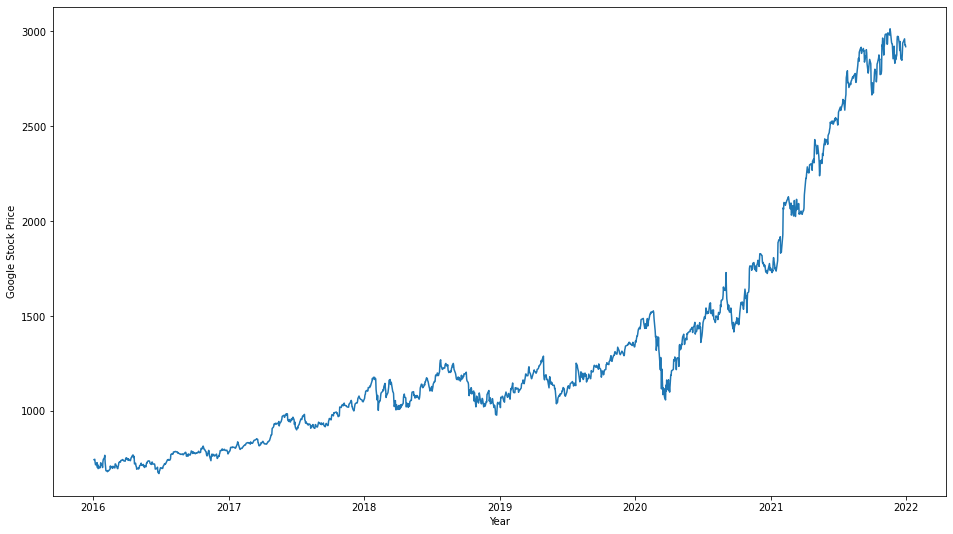

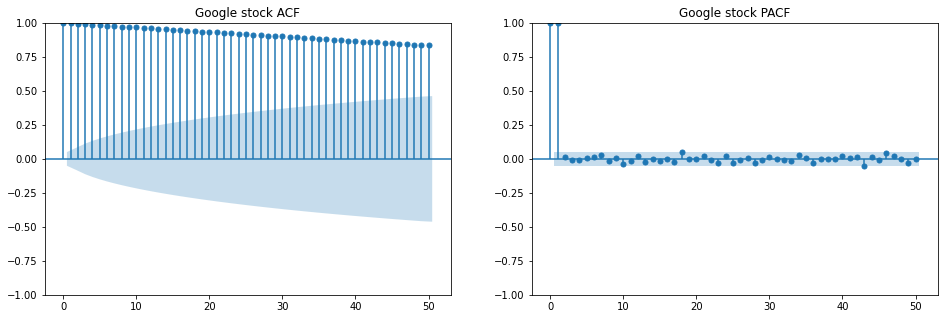

In [8]:
# Time Series plot of Google stock price with ACF and PACF

# Plot of Google stock price
plt.plot(goog)
plt.xlabel("Year")
plt.ylabel("Google Stock Price")
plt.show()

# plot ACF and PACF
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
sm.graphics.tsa.plot_acf(goog, title="Google stock ACF", lags=50, ax=ax1)
sm.graphics.tsa.plot_pacf(goog, title="Google stock PACF", lags=50, ax=ax2)
plt.show()

We can see from the time series plot in figure 1 that there is an upward trend for Google stock price from 2016 to 2021. The ACF plot also shows a slow decreasing trend, which indicates a trend in the time series. 

By using the **Box-Jenkins** method, we will try to use the **differencing** method to remove the trend and keep investigating the time series.


**Figure 3: Plot of First Differencing of Google Stock Price**


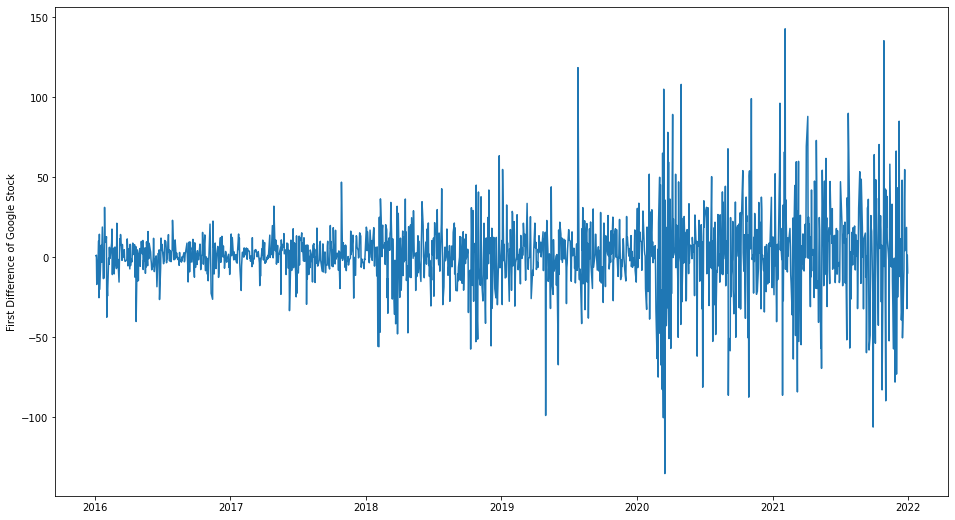

In [9]:
# Plot of First Differencing of Google Stock Price
plt.plot(goog.diff().dropna())
plt.ylabel("First Difference of Google Stock")
plt.show()

From figure 3, we can see that now the differenced time series oscillates around $0$, but the recent movements are more volatile. This indicates that <u> the variance is not constant. </u> It is very common for the financial time series data to have non-constant variance. One way to adjust the time series with non-constant variance is to <u> take the log of the time series. </u> Let's take the log of Google's stock price and do the first differencing. The first difference of the logged Google stock price is very close to Google stock price return, if the return is relatively small. Therefore, in many finance research field, the above method is a way to get the return for a financial asset. Figure 4 shows the result.

**Figure 4: Plot First Differencing of Log of Google Stock Price**


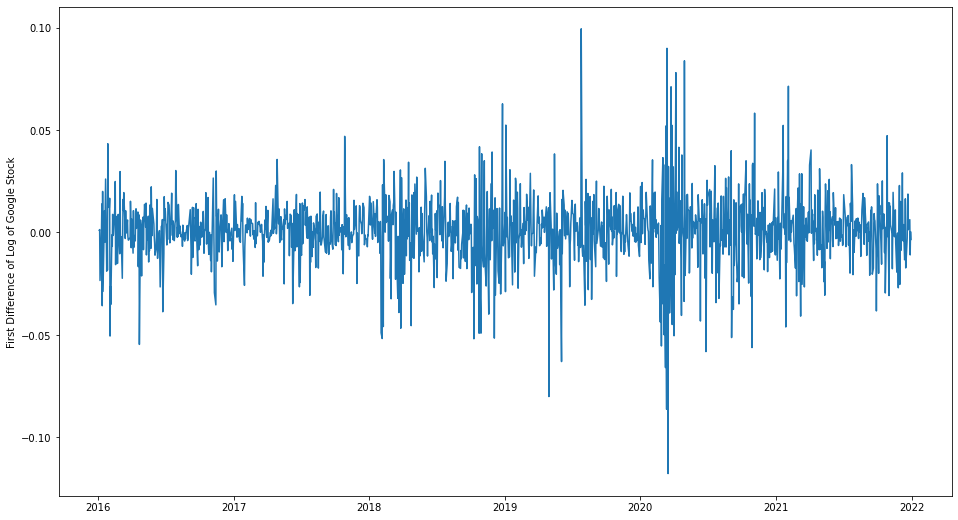

In [10]:
# Plot First Differencing of Log of Google Stock Price
plt.plot(np.log(goog).diff().dropna())
plt.ylabel("First Difference of Log of Google Stock")
plt.show()

From figure 4, we can see the new time series has a more stable variance even though the second half of the investigated period still has higher variation. We will introduce another time series model to model non-constant variance in the next module. For now, let's check ACF and PACF plots for the first difference of logged Google stock price.


**Figure 5: ACF and PACF Plots for First Difference of Logged Google Stock Price**


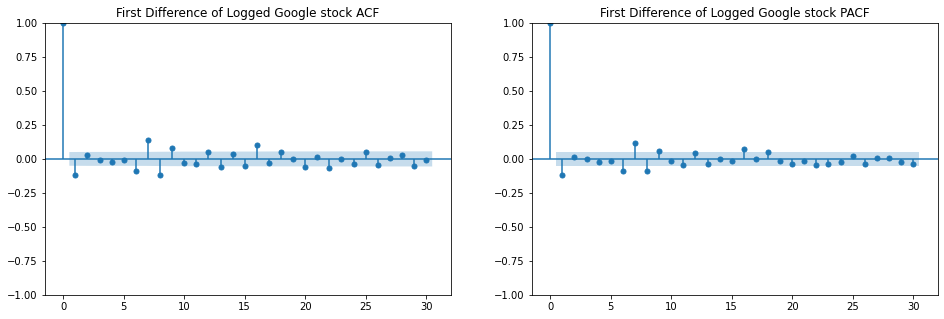

In [11]:
# ACF and PACF Plots for First Difference of Logged Google Stock Price
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
sm.graphics.tsa.plot_acf(
    np.log(goog).diff().dropna(),
    title="First Difference of Logged Google stock ACF",
    lags=30,
    ax=ax1,
)
sm.graphics.tsa.plot_pacf(
    np.log(goog).diff().dropna(),
    title="First Difference of Logged Google stock PACF",
    lags=30,
    ax=ax2,
)
plt.show()

From figure 5, it seems that we can try $p=1$ and/or $q=1$ or any other combinations. Fortunately, the statistical software, can automatically test several models and report back the best model with the lowest AIC. The following report shows various ARIMA models and their corresponding AICs.


**Figure 6: ARIMA Model Selection Report**


In [12]:
# Efficient ARIMA model Selection
mod_can_auto = auto_arima(
    np.log(goog).dropna(),  # stepwise=False,
    start_p=0,
    start_d=0,
    start_q=0,
    max_p=3,
    max_d=3,
    max_q=3,
    trace=True,
    with_intercept=False,
    return_valid_fits=True,
)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-8091.969, Time=0.17 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-8109.119, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-8108.303, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-8107.506, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-8107.472, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-8105.502, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-8112.960, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-8094.611, Time=0.09 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-8111.185, Time=0.53 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-8111.181, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-8112.242, Time=0.18 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-8109.167, Time=0.74 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 2.289 seconds


In figure 6, we can see the software ran a couple of ARIMA models and reported their AICs.

On the left of the table is the ARIMA model specifications, and on the right is the model AICs. The best model from the software is ARIMA(1,1,0). We can see that ARIMA(1,1,0) has the lowest AIC(-8109.119) among other model candidates. Figure 7 shows the MLE estimation for the ARIMA(1,1,0) model.


**Figure 7: ARIMA(1,1,0) Model Estimation**


In [13]:
# Best ARIMA Model for Google stock price
mod_can_a = ARIMA(
    np.log(goog), order=(1, 1, 0), trend="n"
).fit()  # This is the best model in Python implementation
print(mod_can_a.summary())

                               SARIMAX Results                                
Dep. Variable:                 GOOGLE   No. Observations:                 1505
Model:                 ARIMA(1, 1, 0)   Log Likelihood                4056.560
Date:                Thu, 07 Dec 2023   AIC                          -8109.119
Time:                        15:56:37   BIC                          -8098.487
Sample:                             0   HQIC                         -8105.159
                               - 1505                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1125      0.016     -7.255      0.000      -0.143      -0.082
sigma2         0.0003   5.21e-06     51.024      0.000       0.000       0.000
Ljung-Box (L1) (Q):                   0.01   Jarque-

/home/sscf/.pyenv/versions/3.10.5/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sscf/.pyenv/versions/3.10.5/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sscf/.pyenv/versions/3.10.5/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


### **5.2 Model Diagnostics**

Now we have identified the ARIMA model to model Google stock price and have built and estimated the model. Let's check our model diagnostics to see if there are some potential structural patterns in Google stock price time series that our ARIMA model does not capture.


**Figure 8: Diagnostic Report for ARIMA(1,1,0) Model**


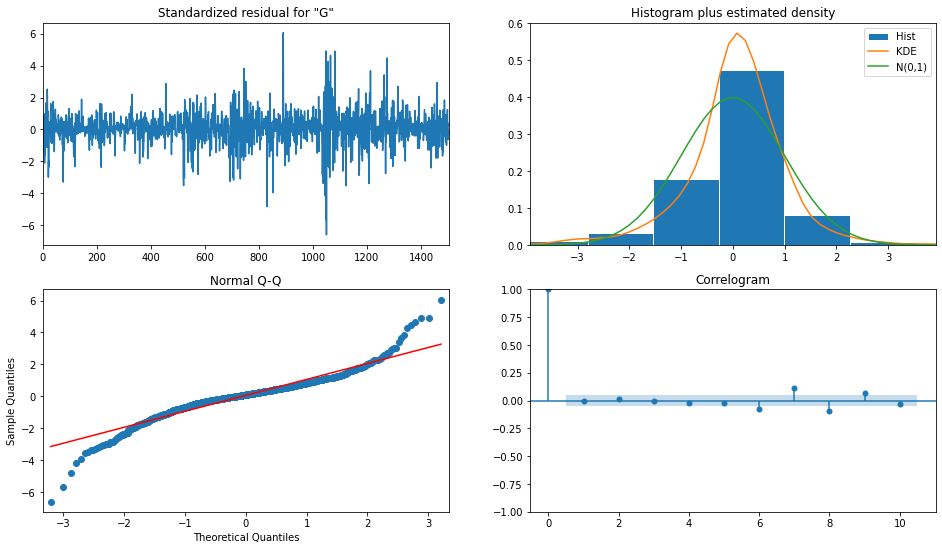

In [14]:
# Diagnostic Report for ARIMA(1,1,0) Model
mod_can_a.plot_diagnostics()
plt.show()

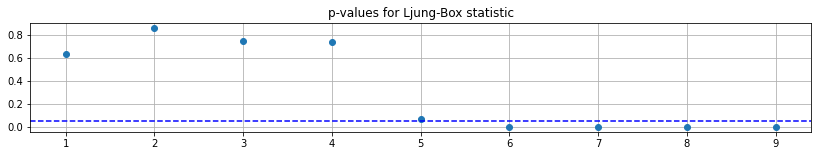

In [15]:
# Ljung-Box test for no serial correlation of standardized residuals
lb_test = mod_can_a.test_serial_correlation(
    method="ljungbox", df_adjust=True, lags=None
)

# plot Ljung-Box test p-values and 0.05 significance line
plt.figure(figsize=(14, 2))
plt.plot(lb_test[0][1], linestyle="", marker="o")
plt.axhline(y=0.05, color="blue", linestyle="--")
plt.title("p-values for Ljung-Box statistic")
plt.grid()
plt.show()

In figure 8, we produce a number of graphs for model diagnostics. The first one is the standardized residuals graph. We can see from the residuals graph that there is a period where the variation is higher than other periods. In the next module, we will introduce a method to model non-constant variance for time series data. In the ACF plot for the residuals, the ACFs below lag 5 are not significant. However, lag 6 to lag 9 are still significant. There might be seasonality activity that the model does not capture. From the QQ plot for the residuals, we can see the residuals are not normally distributed since the plot shows fat tails on both ends. The last graph is the Ljung-Box test. What is the Ljung-Box test?

The Ljung-Box test is to test if a group of autocorrelations from model residuals are small enough to claim the residuals are independent. The test conducts $n$ hypothesis tests for the following $n$ autocorrelation groups: 

> Group 1: autocorrelation 1 <br>
> Group 2: autocorrelation 1, autocorrelation 2 <br>
> Group 3: autocorrelation 1, autocorrelation 2, autocorrelation 3 <br>
> $\quad \vdots$ <br>
> Group $n$: autocorrelation 1, autocorrelation 2, autocorrelation 3, …., autocorrelation $n$ <br>

Each hypothesis test is constructed as follows:

> - Null hypothesis $H_0$: all autocorrelations in the group are small enough so that residuals are independent
> - Alternative hypothesis $H_1$: all autocorrelations in the group are not small enough so that the residuals are not independent

If the $p$-value from each hypothesis test is $> 0.05$, we cannot reject the null hypothesis. We then conclude that residuals from this model are independent.

Now that we know what the Ljung-Box test is, we can look at the test graph report in figure 8. From the plot, we see that the groups with lags equal to and less than 5 are all not significant. However, from lag 6 and afterwards, there are some autocorrelations that exist from Ljung-Box Test. Combining this piece of information with ACF plot for residuals, we see there might be a seasonality component that the model neglects to capture.


### **5.3 Forecast of ARIMA(1,1,0)**

Next, once we are satisfied with our model result, we will start to forecast where Google's stock price will be. In figure 9, we forecast Google stock prices for the next 100 days with 80% confidence interval and 95% confidence interval.


**Figure 9: Forecast Plot of ARIMA(1,1,0) with 80% Confidence Interval and 95% Confidence Interval**


/home/sscf/.pyenv/versions/3.10.5/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sscf/.pyenv/versions/3.10.5/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


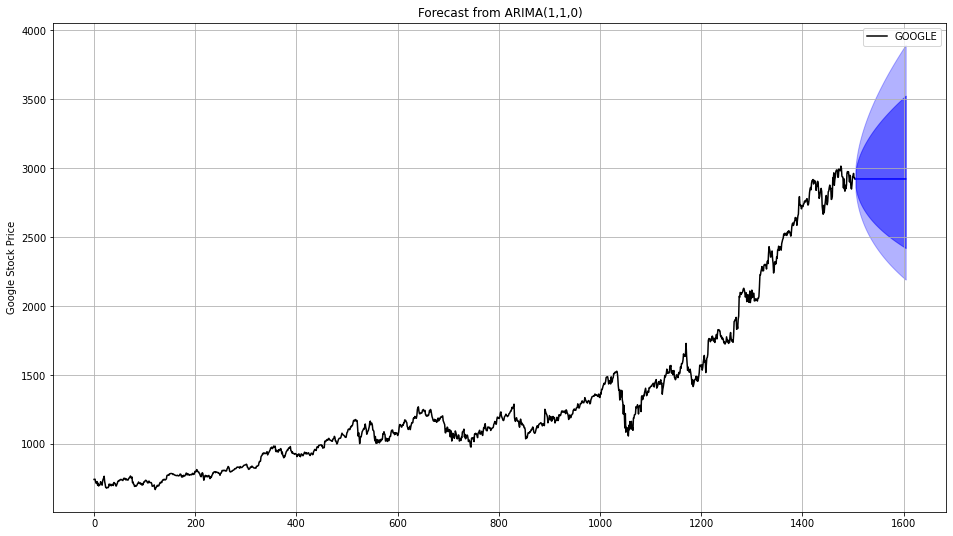

In [16]:
# Forecast Plot of ARIMA(1,1,0) with 95% Confidence Interval

# Plot Google data
ffx = goog.copy()
ffx.index = [i for i in range(len(ffx))]  # Set numeric index
ffx.plot(ylabel="Google Stock Price", title="Forecast from ARIMA(1,1,0)", color="k")

# get forecast data for next 100 steps
forecast = mod_can_a.get_forecast(steps=100)
forecast_mean = np.exp(forecast.predicted_mean)  # mean of forecast data
conf_int95 = forecast.conf_int(alpha=0.05)  # 95% confidence interval
conf_int80 = forecast.conf_int(alpha=0.2)  # 80% confidence interval

# plot mean forecast and 95% and 80% confidence intervals
plt.plot(forecast_mean, c="b")
plt.fill_between(
    conf_int95.index,
    np.exp(conf_int95["lower GOOGLE"]),
    np.exp(conf_int95["upper GOOGLE"]),
    color="b",
    alpha=0.3,
)
plt.fill_between(
    conf_int80.index,
    np.exp(conf_int80["lower GOOGLE"]),
    np.exp(conf_int80["upper GOOGLE"]),
    color="b",
    alpha=0.5,
)
plt.grid()
plt.show()

From figure 9, we can see that there is a 80% chance (darker blue shade) that Google's stock price will move within 2400 and 3600 for the next 100 days. 
